In [40]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2db2e483-08b7-49bf-942d-868184e0e4c4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-12-16T11:06:57.510Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 8906}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10649, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [41]:
type(data)

dict

In [47]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [43]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.957155e+07,1.957155e+07,False,NaN,1,NaN,NaN,None,2023-12-16T11:06:00.000Z,42228.673960,1.798857e+10,-29.5083,0.040159,-1.328513,-3.721964,12.937605,48.226545,58.698408,8.264806e+11,51.6304,8.868022e+11,None,2023-12-16T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
1,1027,Ethereum,ETH,ethereum,8056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202028e+08,1.202028e+08,True,NaN,2,NaN,NaN,None,2023-12-16T11:06:00.000Z,2246.584404,8.815268e+09,-29.3787,0.024398,-1.266284,-4.723093,9.461867,41.746326,37.447656,2.700458e+11,16.8698,2.700458e+11,None,2023-12-16T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
2,825,Tether USDt,USDT,tether,68298,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.091251e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-16T11:05:00.000Z,0.999286,4.042901e+10,-22.1410,-0.016762,-0.135005,-0.112057,-0.096915,-0.127655,-0.113019,9.084762e+10,5.6753,9.354227e+10,None,2023-12-16T11:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-16 11:06:57.098902+00:00
3,1839,BNB,BNB,bnb,1863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516956e+08,1.516956e+08,False,NaN,4,NaN,NaN,None,2023-12-16T11:05:00.000Z,246.673640,7.391573e+08,-8.5301,-0.143171,-1.535899,1.959880,-2.002463,15.950025,14.717057,3.741931e+10,2.3376,3.741931e+10,None,2023-12-16T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
4,52,XRP,XRP,xrp,1175,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,None,2023-12-16T11:06:00.000Z,0.622813,1.040739e+09,-32.5912,0.125269,-1.455088,-8.905434,-3.183112,27.079213,24.956041,3.363541e+10,2.1012,6.228133e+10,None,2023-12-16T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
5,5426,Solana,SOL,solana,562,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.276191e+08,5.648729e+08,True,NaN,6,NaN,NaN,None,2023-12-16T11:06:00.000Z,74.396937,2.302915e+09,-23.1556,0.497433,-5.351583,-3.337727,13.913633,207.577548,289.537455,3.181355e+10,1.9870,4.202481e+10,None,2023-12-16T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
6,3408,USDC,USDC,usd-coin,15567,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.463252e+10,2.463252e+10,False,NaN,7,NaN,NaN,None,2023-12-16T11:05:00.000Z,0.999984,5.097876e+09,-22.3707,-0.012527,-0.040487,-0.010747,0.008248,-0.024153,-0.014781,2.463213e+10,1.5388,2.463213e+10,None,2023-12-16T11:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-16 11:06:57.098902+00:00
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533742e+10,3.643998e+10,False,NaN,8,NaN,NaN,None,2023-12-16T11:05:00.000Z,0.614107,7.850338e+08,-24.2151,0.329088,-3.650122,-2.765771,55.649930,144.205044,145.499079,2.170094e+10,1.3557,2.763480e+10,None,2023-12-16T11:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:06:57.098902+00:00
8,5805,Avalanche,AVAX,avalanche,596,2020-07-13T00:00

In [53]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2db2e483-08b7-49bf-942d-868184e0e4c4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now',utc=True)
    df = pd.concat([df, df2])

In [54]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API RUNNER DONE')
    sleep(60)
exit()

API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE
API RUNNER DONE


KeyboardInterrupt: 

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.957155e+07,1.957155e+07,False,NaN,1,NaN,NaN,None,2023-12-16T11:26:00.000Z,42207.261580,1.790105e+10,-29.6677,0.050714,-1.237483,-3.649399,12.630704,48.244132,58.657579,8.260615e+11,51.6226,8.863525e+11,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
1,1027,Ethereum,ETH,ethereum,8056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202028e+08,1.202028e+08,True,NaN,2,NaN,NaN,None,2023-12-16T11:26:00.000Z,2245.711197,8.731270e+09,-30.1356,0.050732,-1.187753,-4.589779,8.684992,41.685239,37.562638,2.699408e+11,16.8692,2.699408e+11,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
2,825,Tether USDt,USDT,tether,68299,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.091251e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-16T11:25:00.000Z,0.999362,4.026300e+10,-22.3488,0.002070,-0.084743,-0.121293,-0.120814,-0.110410,-0.088946,9.085447e+10,5.6777,9.354932e+10,None,2023-12-16T11:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-16 11:27:17.290941+00:00
3,1839,BNB,BNB,bnb,1863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516956e+08,1.516956e+08,False,NaN,4,NaN,NaN,None,2023-12-16T11:25:00.000Z,246.421088,7.359641e+08,-9.1215,-0.138733,-1.608862,2.185242,-2.545118,16.001170,14.716826,3.738100e+10,2.3360,3.738100e+10,None,2023-12-16T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
4,52,XRP,XRP,xrp,1175,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,None,2023-12-16T11:26:00.000Z,0.622084,1.032628e+09,-33.0051,-0.019479,-1.528549,-9.103110,-3.630642,26.516745,24.879564,3.359604e+10,2.0995,6.220844e+10,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
5,5426,Solana,SOL,solana,562,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.276191e+08,5.648729e+08,True,NaN,6,NaN,NaN,None,2023-12-16T11:26:00.000Z,74.309729,2.284158e+09,-24.1710,0.478295,-4.986640,-2.939111,13.797062,207.041084,289.406548,3.177626e+10,1.9857,4.197555e+10,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
6,3408,USDC,USDC,usd-coin,15567,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.463252e+10,2.463252e+10,False,NaN,7,NaN,NaN,None,2023-12-16T11:26:00.000Z,1.000020,5.076046e+09,-22.3123,0.007105,-0.023133,-0.008459,-0.001741,-0.005771,-0.009638,2.463301e+10,1.5394,2.463301e+10,None,2023-12-16T11:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-16 11:27:17.290941+00:00
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533742e+10,3.643998e+10,False,NaN,8,NaN,NaN,None,2023-12-16T11:25:00.000Z,0.611404,7.813353e+08,-23.4858,-0.148384,-3.909402,-2.989914,53.938341,143.298439,144.444873,2.160544e+10,1.3502,2.751318e+10,None,2023-12-16T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
8,5805,Avalanche,AVAX,avalanche,596,2020-07-13T00:0

In [56]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19571550.00000,19571550.00000,False,NaN,1,NaN,NaN,None,2023-12-16T11:26:00.000Z,42207.26158,17901045309.78519,-29.66770,0.05071,-1.23748,-3.64940,12.63070,48.24413,58.65758,826061530374.26721,51.62260,886352493178.08997,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
1,1027,Ethereum,ETH,ethereum,8056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120202828.89091,120202828.89091,True,NaN,2,NaN,NaN,None,2023-12-16T11:26:00.000Z,2245.71120,8731270463.71842,-30.13560,0.05073,-1.18775,-4.58978,8.68499,41.68524,37.56264,269940838809.64453,16.86920,269940838809.64001,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
2,825,Tether USDt,USDT,tether,68299,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90912507793.55255,93609080552.14795,True,NaN,3,NaN,NaN,None,2023-12-16T11:25:00.000Z,0.99936,40262997801.10241,-22.34880,0.00207,-0.08474,-0.12129,-0.12081,-0.11041,-0.08895,90854470495.02467,5.67770,93549321798.53999,None,2023-12-16T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-16 11:27:17.290941+00:00
3,1839,BNB,BNB,bnb,1863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151695617.36866,151695617.36866,False,NaN,4,NaN,NaN,None,2023-12-16T11:25:00.000Z,246.42109,735964083.61192,-9.12150,-0.13873,-1.60886,2.18524,-2.54512,16.00117,14.71683,37380999053.29892,2.33600,37380999053.30000,None,2023-12-16T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
4,52,XRP,XRP,xrp,1175,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54005597115.00000,99988151135.00000,False,NaN,5,NaN,NaN,None,2023-12-16T11:26:00.000Z,0.62208,1032628041.22997,-33.00510,-0.01948,-1.52855,-9.10311,-3.63064,26.51675,24.87956,33596041815.22012,2.09950,62208444327.87000,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
5,5426,Solana,SOL,solana,562,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427619142.45038,564872896.90114,True,NaN,6,NaN,NaN,None,2023-12-16T11:26:00.000Z,74.30973,2284157528.16761,-24.17100,0.47829,-4.98664,-2.93911,13.79706,207.04108,289.40655,31776262586.88682,1.98570,41975551883.13000,None,2023-12-16T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-16 11:27:17.290941+00:00
6,3408,USDC,USDC,usd-coin,15567,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24632519735.97000,24632519735.97000,False,NaN,7,NaN,NaN,None,2023-12-16T11:26:00.000Z,1.00002,5076046439.14738,-22.31230,0.00711,-0.02313,-0.00846,-0.00174,-0.00577,-0.00964,24633011704.62565,1.53940,24633011704.63000,None,2023-12-16T11:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-16 11:27:17.290941+00:00
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35337418027.98700,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-16T11:25:00.000Z,0.61140,781335335.66044,-23.48580,-0.14838,-3.90940,-2.98991,53.93834,143.29844,144.44487,21605438772.51215,1

In [60]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16256,-1.19523,-3.56657,12.74895,48.40012,58.82932
Ethereum,0.18211,-1.11090,-4.44631,8.25657,41.86904,37.79866
Tether USDt,-0.00202,-0.08207,-0.11088,-0.10718,-0.10851,-0.10064
BNB,-0.05108,-1.47303,1.98592,-2.52147,16.01121,14.78816
XRP,0.07787,-1.37189,-9.02262,-3.57650,26.53201,25.03273
Solana,0.62193,-5.04513,-2.95308,14.90914,207.95386,290.51191
USDC,-0.00163,-0.01057,-0.01149,-0.00723,-0.00491,-0.01406
Cardano,0.14842,-3.70259,-1.57998,54.85107,144.22218,145.27972
Avalanche,0.95976,3.87738,25.48389,79.81303,355.13635,356.91140


In [61]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.16256
             quote.USD.percent_change_24h    -1.19523
             quote.USD.percent_change_7d     -3.56657
             quote.USD.percent_change_30d    12.74895
             quote.USD.percent_change_60d    48.40012
             quote.USD.percent_change_90d    58.82932
Ethereum     quote.USD.percent_change_1h      0.18211
             quote.USD.percent_change_24h    -1.11090
             quote.USD.percent_change_7d     -4.44631
             quote.USD.percent_change_30d     8.25657
             quote.USD.percent_change_60d    41.86904
             quote.USD.percent_change_90d    37.79866
Tether USDt  quote.USD.percent_change_1h     -0.00202
             quote.USD.percent_change_24h    -0.08207
             quote.USD.percent_change_7d     -0.11088
             quote.USD.percent_change_30d    -0.10718
             quote.USD.percent_change_60d    -0.10851
             quote.USD.percent_change_90

In [63]:
type(df4)

pandas.core.series.Series

In [64]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.16256
            quote.USD.percent_change_24h  -1.19523
            quote.USD.percent_change_7d   -3.56657
            quote.USD.percent_change_30d  12.74895
            quote.USD.percent_change_60d  48.40012
            quote.USD.percent_change_90d  58.82932
Ethereum    quote.USD.percent_change_1h    0.18211
            quote.USD.percent_change_24h  -1.11090
            quote.USD.percent_change_7d   -4.44631
            quote.USD.percent_change_30d   8.25657
            quote.USD.percent_change_60d  41.86904
            quote.USD.percent_change_90d  37.79866
Tether USDt quote.USD.percent_change_1h   -0.00202
            quote.USD.percent_change_24h  -0.08207
            quote.USD.percent_change_7d   -0.11088
            quote.USD.percent_change_30d  -0.10718
            quote.USD.percent_change_60d  -0.10851
            quote.USD.percent_change_90d  -0.10064
BNB         quote.USD.percent_change_1h   -0.05108
            quote.USD.percent_change_24h  -1.47303
            quote.USD.percent_change_7d    1.98592
            quote.USD.percent_change_30d  -2.52147
            quote.USD.percent_change_60d  16.01121
            quote.USD.percent_change_90d  14.78816
XRP         quote.USD.percent_change_1h    0.07787
            quote.USD.percent_change_24h  -1.37189
            quote.USD.percent_change_7d   -9.02262
            quote.USD.percent_change_30d  -3.57650
            quote.USD.percent_change_60d  26.53201
            quote.USD.percent_change_90d  25.03273
Solana      quote.USD.percent_change_1h    0.62193
            quote.USD.percent_change_24h  -5.04513
            quote.USD.percent_change_7d   -2.95308
            quote.USD.percent_change_30d  14.90914
            quote.USD.percent_change_60d 207.95386
            quote.USD.percent_change_90d 290.51191
USDC        quote.USD.percent_change_1h   -0.00163
            quote.USD.percent_change_24h  -0.01057
            quote.USD.percent_change_7d   -0.01149
            quote.USD.percent_change_30d  -0.00723
            quote.USD.percent_change_60d  -0.00491
            quote.USD.percent_change_90d  -0.01406
Cardano     quote.USD.percent_change_1h    0.14842
            quote.USD.percent_change_24h  -3.70259
            quote.USD.percent_change_7d   -1.57998
            quote.USD.percent_change_30d  54.85107
            quote.USD.percent_change_60d 144.22218
            quote.USD.percent_change_90d 145.27972
Avalanche   quote.USD.percent_change_1h    0.95976
            quote.USD.percent_change_24h   3.87738
            quote.USD.percent_change_7d   25.48389
            quote.USD.percent_change_30d  79.81303
            quote.USD.percent_change_60d 355.13635
            quote.USD.percent_change_90d 356.91140
Dogecoin    quote.USD.percent_change_1h    0.21485
            quote.USD.percent_change_24h  -2.07812
            quote.USD.percent_change_7d   -7.44697
            quote.USD.percent_change_30d  15.55243
            quote.USD.percent_change_60d  57.30277
            quote.USD.percent_change_90d  51.38387
TRON        quote.USD.percent_change_1h   -0.02852
            quote.USD.percent_change_24h  -1.75226
            quote.USD.percent_change_7d   -4.43752
            quote.USD.percent_change_30d  -1.22836
            quote.USD.percent_change_60d  16.50033
            quote.USD.percent_change_90d  23.16216
Polkadot    quote.USD.percent_change_1h    0.20719
            quote.USD.percent_change_24h  -2.54925
            quote.USD.percent_change_7d   -5.09644
            quote.USD.percent_change_30d  26.11777
            quote.USD.percent_change_60d  91.13082
            quote.USD.percent_change_90d  72.72633
Chainlink   quote.USD.percent_change_1h    0.29947
            quote.USD.percent_change_24h  -3.96929
            quote.USD.percent_change_7d  -14.15842
            quote.USD.percent_change_30d  -2.38006
            quote.USD.percent_change_60d  93.43347
            quo

In [65]:
df5.count()

values    90
dtype: int64

In [68]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.16256
1,Bitcoin,quote.USD.percent_change_24h,-1.19523
2,Bitcoin,quote.USD.percent_change_7d,-3.56657
3,Bitcoin,quote.USD.percent_change_30d,12.74895
4,Bitcoin,quote.USD.percent_change_60d,48.40012
5,Bitcoin,quote.USD.percent_change_90d,58.82932
6,Ethereum,quote.USD.percent_change_1h,0.18211
7,Ethereum,quote.USD.percent_change_24h,-1.11090
8,Ethereum,quote.USD.percent_change_7d,-4.44631
9,Ethereum,quote.USD.percent_change_30d,8.25657


In [75]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16256
1,Bitcoin,quote.USD.percent_change_24h,-1.19523
2,Bitcoin,quote.USD.percent_change_7d,-3.56657
3,Bitcoin,quote.USD.percent_change_30d,12.74895
4,Bitcoin,quote.USD.percent_change_60d,48.40012
5,Bitcoin,quote.USD.percent_change_90d,58.82932
6,Ethereum,quote.USD.percent_change_1h,0.18211
7,Ethereum,quote.USD.percent_change_24h,-1.11090
8,Ethereum,quote.USD.percent_change_7d,-4.44631
9,Ethereum,quote.USD.percent_change_30d,8.25657


In [79]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.16256
1,Bitcoin,24h,-1.19523
2,Bitcoin,7d,-3.56657
3,Bitcoin,30d,12.74895
4,Bitcoin,60d,48.40012
5,Bitcoin,90d,58.82932
6,Ethereum,1h,0.18211
7,Ethereum,24h,-1.11090
8,Ethereum,7d,-4.44631
9,Ethereum,30d,8.25657


In [84]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

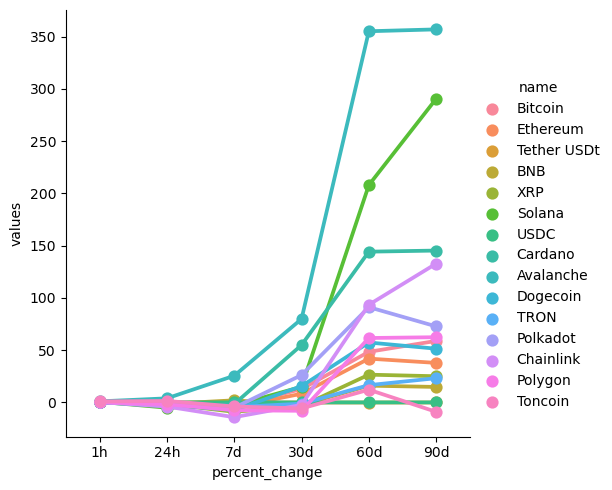

In [85]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [92]:
df9=df[['name','quote.USD.price','timestamp']]
df10=df9.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42207.26158,2023-12-16 11:27:17.290941+00:00
0,Bitcoin,42235.75591,2023-12-16 11:31:15.322022+00:00
0,Bitcoin,42240.74463,2023-12-16 11:32:15.977752+00:00
0,Bitcoin,42241.29300,2023-12-16 11:33:16.638885+00:00
0,Bitcoin,42242.41322,2023-12-16 11:34:16.983777+00:00
0,Bitcoin,42246.07378,2023-12-16 11:35:17.271045+00:00
0,Bitcoin,42248.09974,2023-12-16 11:36:17.541054+00:00
0,Bitcoin,42263.47794,2023-12-16 11:37:18.863112+00:00
0,Bitcoin,42266.98040,2023-12-16 11:38:19.171545+00:00
0,Bitcoin,42275.70915,2023-12-16 11:39:19.442307+00:00


In [95]:
# Check for duplicate timestamps
duplicate_timestamps = df9[df9.duplicated('timestamp')]
print("Duplicate Timestamps:")
print(duplicate_timestamps)

# Drop duplicate timestamps
df9 = df9.drop_duplicates('timestamp', keep='first')

# Reset the index
df9 = df9.reset_index(drop=True)

# Verify that duplicates are removed
print("Duplicate Check After Removal:")
print(df9[df9.duplicated('timestamp')])




Duplicate Timestamps:
Empty DataFrame
Columns: [name, quote.USD.price, timestamp]
Index: []
Duplicate Check After Removal:
Empty DataFrame
Columns: [name, quote.USD.price, timestamp]
Index: []


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

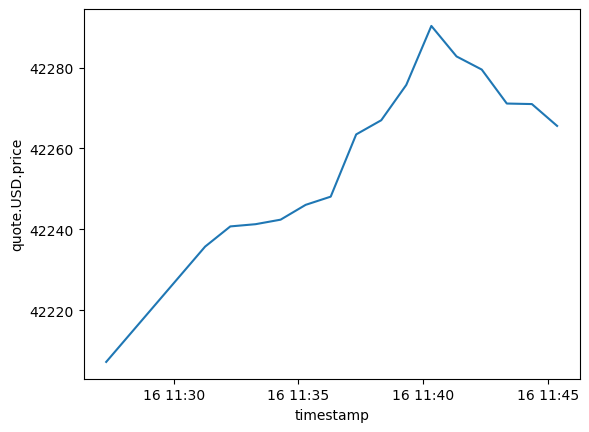

In [96]:
# Plot the line chart
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)